In [1]:
import pandas as pb 
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.special import expit

In [2]:
data = pb.read_excel("/Users/jonathanmata/Documents/Ai_Project/Combined Data with averages.xlsx")

x= data.loc[:,('HW Average','PJ01 ','EX 01','Quiz Average')]

x['HW Average']=x['HW Average']*5

grade = data['Grade']

finalGrade = data['Final']

# encode the letter grades 
coded_Grades = grade.apply(lambda char: 1 if char == 'F' else 0).tolist()

X_train, X_test,Y_train,Y_test = train_test_split(x,coded_Grades,random_state=55,test_size=.33)


print (coded_Grades)

[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [3]:
clf = LogisticRegression(random_state=0).fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.92

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Define hyperparameters grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

# Get the best model and its parameters
best_log_reg = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

Best Parameters: {'C': 1}
LogisticRegression(C=1, random_state=0)
0.8700000000000001


In [6]:
y_pred = best_log_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      0.69      0.82        13

    accuracy                           0.92        50
   macro avg       0.95      0.85      0.88        50
weighted avg       0.93      0.92      0.91        50

Confusion Matrix:
[[37  0]
 [ 4  9]]


In [7]:
finalLR = LogisticRegression(random_state=0,C=1).fit(X_train_scaled,Y_train)
y_pred = finalLR.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

# Generate confusion matrix
# first column is the predicted resualt for a positive out come 
# fisrt row is the actual positive out come 
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      0.69      0.82        13

    accuracy                           0.92        50
   macro avg       0.95      0.85      0.88        50
weighted avg       0.93      0.92      0.91        50

Confusion Matrix:
[[37  0]
 [ 4  9]]


In [8]:
average_row_num= np.mean(X_train_scaled ,axis=1).reshape(-1,1)
testx= np.mean(X_test_scaled ,axis=1).reshape(-1,1)
finalLRAve = LogisticRegression(random_state=0,C=1).fit(average_row_num,Y_train)
y_pred = finalLRAve.predict(testx)

Ploting the data and show how the Logistic Regression is working 

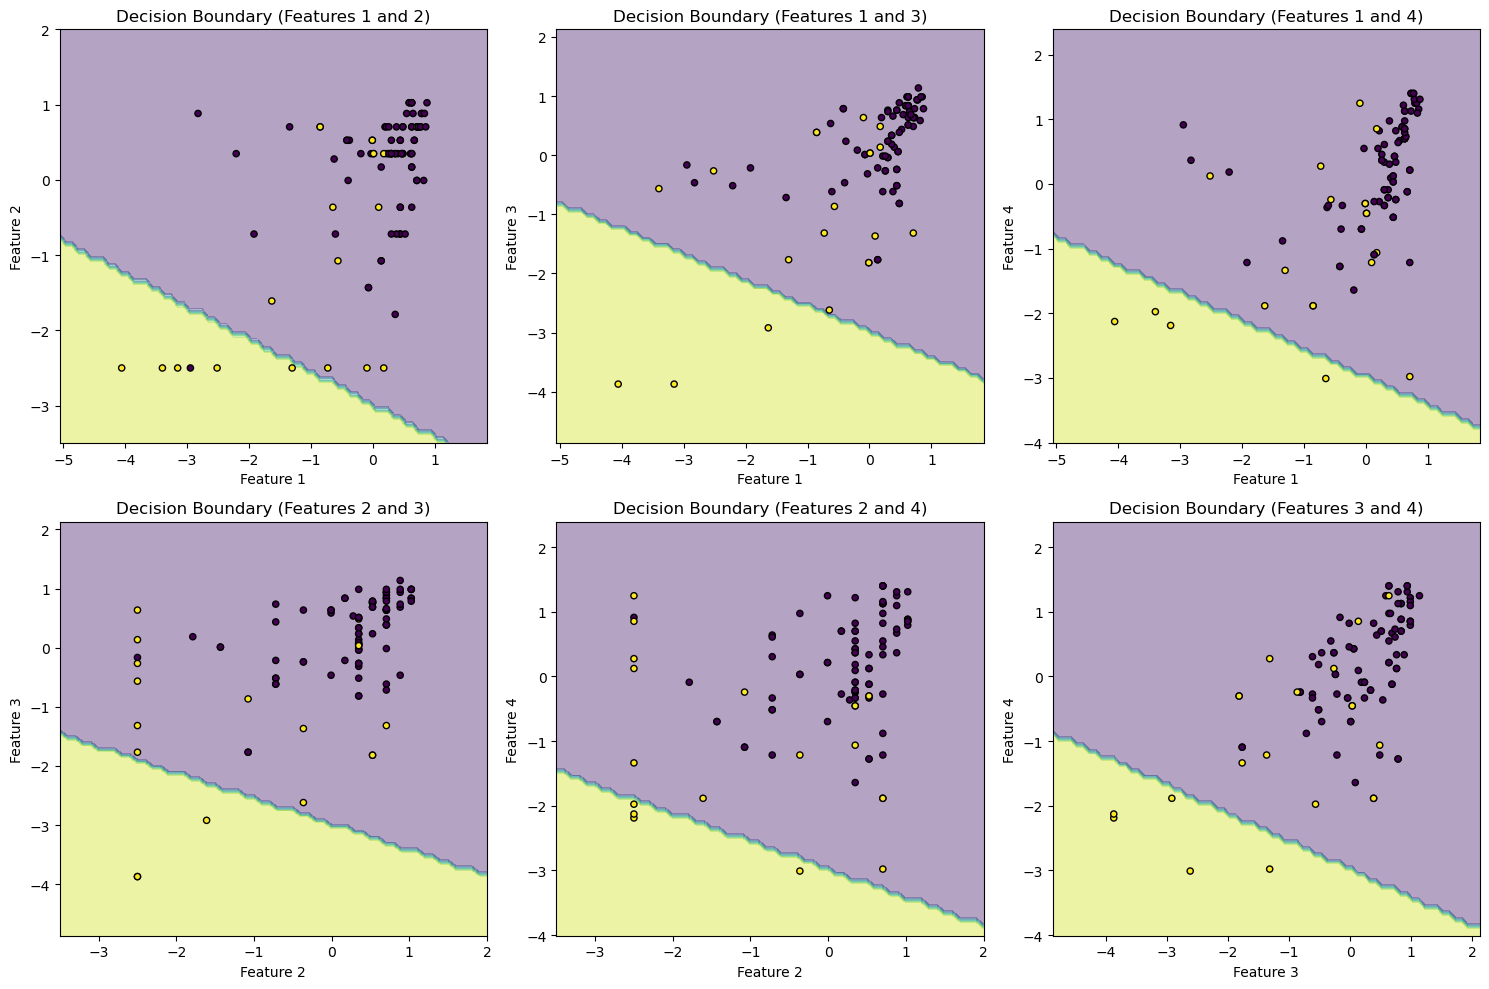

In [9]:


# Plot decision boundary for pairs of features
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

plt.figure(figsize=(15, 10))

for i, (f1, f2) in enumerate(feature_pairs, 1):
    plt.subplot(2, 3, i)
    
    # Plot decision boundary
    x_min, x_max = X_train_scaled[:, f1].min() - 1, X_train_scaled[:, f1].max() + 1
    y_min, y_max = X_train_scaled[:, f2].min() - 1, X_train_scaled[:, f2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = finalLR.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train_scaled[:, f1], X_train_scaled[:, f2], c=Y_train, s=20, edgecolor='k')
    plt.title(f'Decision Boundary (Features {f1+1} and {f2+1})')
    plt.xlabel(f'Feature {f1+1}')
    plt.ylabel(f'Feature {f2+1}')

plt.tight_layout()
plt.show()

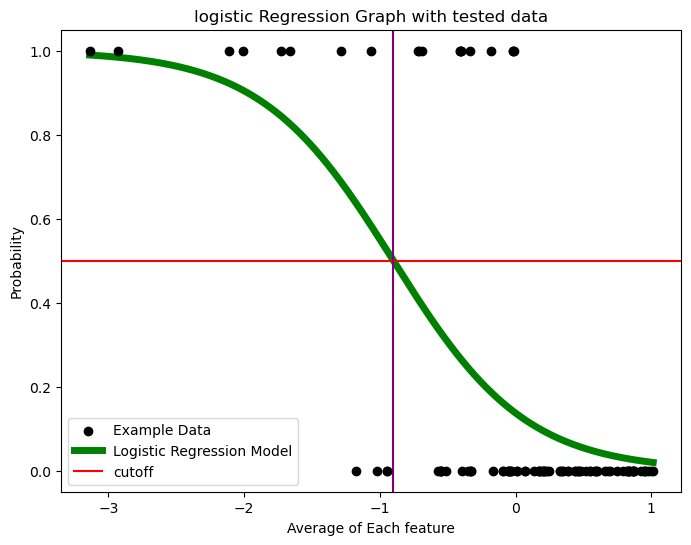

In [11]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot example data
average_row_num= np.mean(X_train_scaled ,axis=1)
ax.scatter(average_row_num, Y_train, label="Example Data", color="black", zorder=20)

# Generate predicted probabilities from the logistic regression model
x_test = np.linspace(average_row_num.min(), average_row_num.max(), 300).reshape(-1, 1)
loss = expit(x_test * finalLRAve.coef_ + finalLRAve.intercept_)

# Plot logistic regression model
ax.plot(x_test, loss.ravel(), label="Logistic Regression Model", color="green", linewidth=5)

# Draw a horizontal line (in red) indicating the threshold (cutoff) probability
plt.axhline(.5, color="red", label="cutoff")
 
# Draw a vertical line (in purple) indicating the threshold (cutoff) sepal length
plt.axvline(-.90, color="purple", label="")
plt.title("logistic Regression Graph with tested data")
# Set plot labels and legend
ax.set_xlabel("Average of Each feature")
ax.set_ylabel("Probability")
ax.legend()

# Show plot
plt.show()

remeber proability of 0 is guessing pass f is 1 